## Import the relevant libraries

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
sns.set()

## Load the data

In [190]:
Raw_Data = pd.read_csv("heart.csv")

In [191]:
print(Raw_Data.shape)
Raw_Data.head()

(303, 14)


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [192]:
Raw_Data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

## Data Preprocessing

In [195]:
# Rename columns
Raw_Data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'number_major_vessels', 'thalassemia', 'target']

In [196]:
pp.ProfileReport(Raw_Data, title = ' Profiling Report', html = {'style':{'full_width': True}})

## Analyse Feature in Dependence on the Target Variable

In [366]:
#Separate Categorical and Numerical Features
Numerical_Feature = ['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved',
                     'st_depression','number_major_vessels']
Categorical_Feature = ['sex', 'chest_pain_type','fasting_blood_sugar','rest_ecg', 'exercise_induced_angina','st_slope','thalassemia']
print("Numerical:", len(Numerical_Feature))
print("Categorical:",len(Categorical_Feature))
#Df without Features

Numerical: 6
Categorical: 7


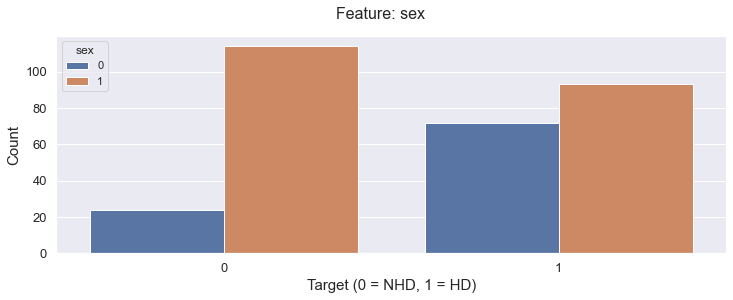

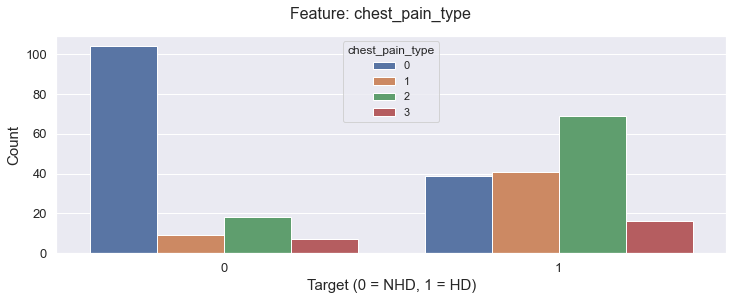

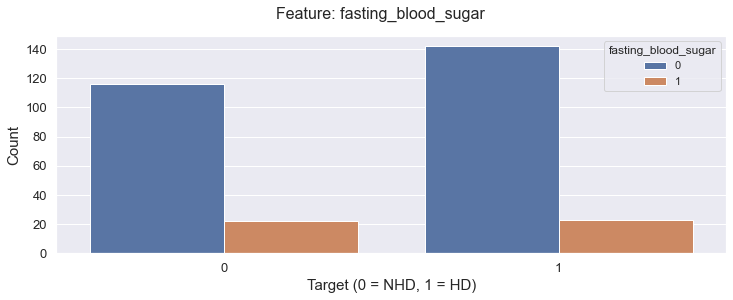

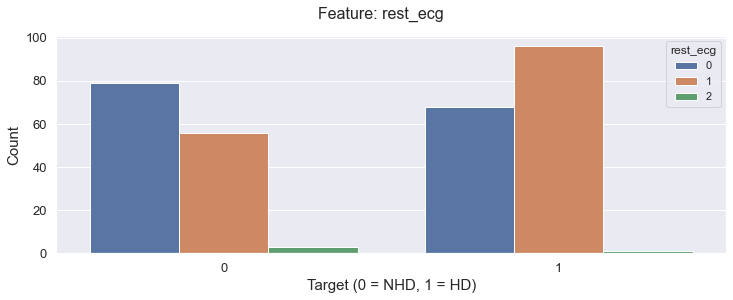

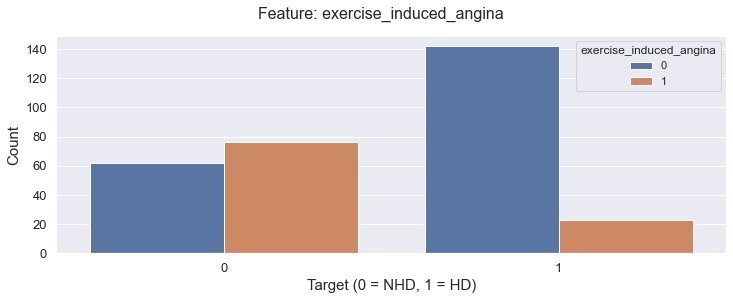

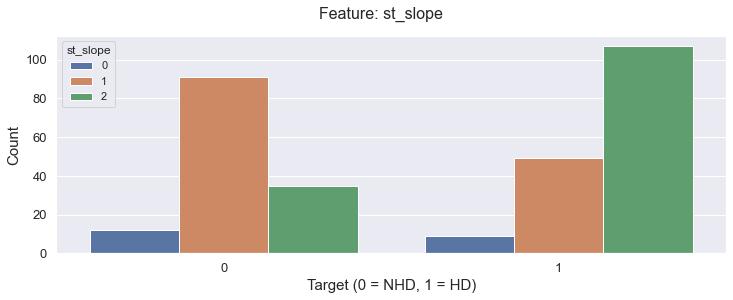

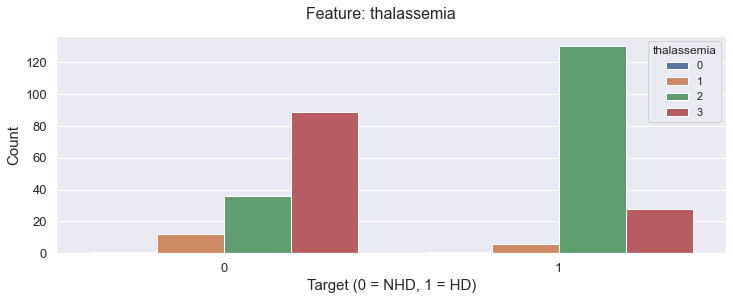

In [367]:
Label_Size = 15
Ticks_Size = 13
for i in range(0, len(Categorical_Feature)):
      title = "Feature: " + Categorical_Feature[i] 
      plt.figure(figsize=(12,4))
      plt.suptitle(title, fontsize=16)
      ax = sns.countplot(x="target",hue=Categorical_Feature[i], data=Raw_Data)
      #Size of ticks and Labels
      ax.set_xlabel('Target (0 = NHD, 1 = HD)', fontsize = Label_Size)
      ax.set_ylabel('Count', fontsize = Label_Size)
      ax.tick_params(axis='both', labelsize = Ticks_Size)
      plt.show()


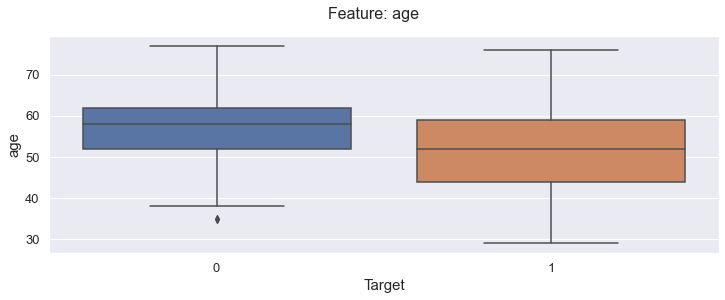

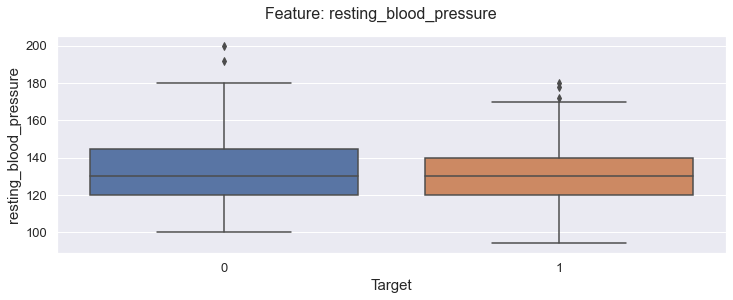

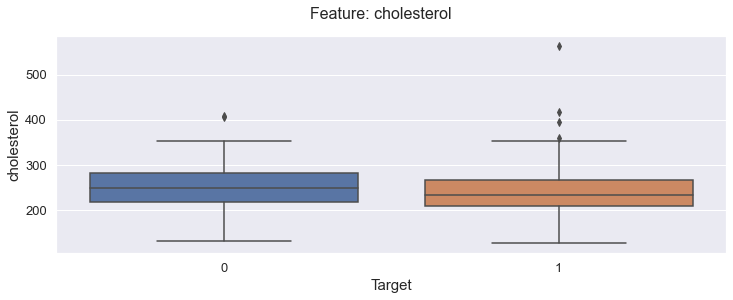

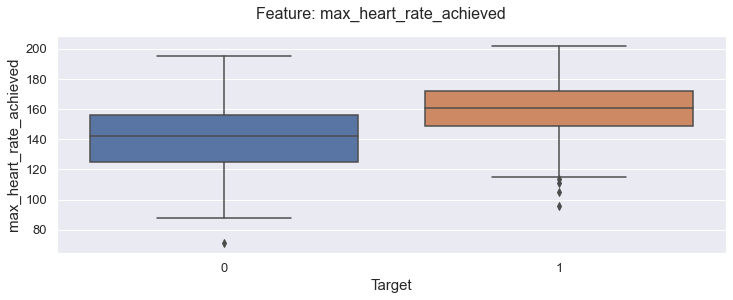

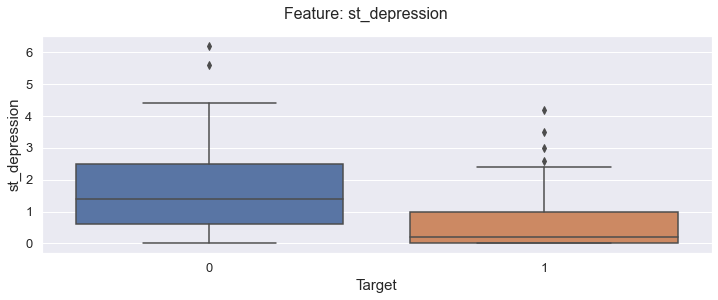

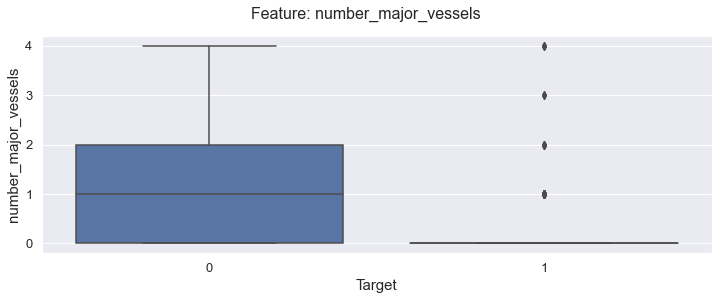

In [368]:
Label_Size = 15
Ticks_Size = 13
for i in range(0, len(Numerical_Feature)):
      title = "Feature: " + Numerical_Feature[i] 
      plt.figure(figsize=(12,4))
      plt.suptitle(title, fontsize=16)
      ax = sns.boxplot(x="target", y=Numerical_Feature[i], data=Raw_Data)
      #Size of ticks and Labels
      ax.set_xlabel('Target', fontsize = Label_Size)
      ax.set_ylabel( Numerical_Feature[i], fontsize = Label_Size)
      ax.tick_params(axis='both', labelsize = Ticks_Size)
      plt.show()


In [369]:
#Create Dummy Variables for Categorical Values chest_pain_type, thalassemia ,st_slope
Df_Dummy = Raw_Data.copy()


a = pd.get_dummies(Raw_Data['chest_pain_type'], prefix = "chest_pain_type")
b = pd.get_dummies(Raw_Data['thalassemia'], prefix = "thalassemia")
c = pd.get_dummies(Raw_Data['st_slope'], prefix = "st_slope")

frames = [Df_Dummy, a, b, c]
Df_Dummy = pd.concat(frames, axis = 1)
Df_Dummy.head()




age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    1         0                      150   
1                    0         1                      187   
2                    0         0                      172   
3                    0         1                      178   
4                    0         1                      163   

   exercise_induced_angina  st_depression  ...  chest_pain_type_1  \
0                        0            2.3  ...                  0   
1                        0            3.5  ...                  0   
2                        0            1.4  ...                  1   
3                        0            0.8  ...                  1   
4                        1            0.6  ...                  0   

   chest_pain_type_2  chest_pain_type_3  thalassemia_0  thalassemia_1  \
0                  0                  1              0              1   
1                  1                  0              0              0   
2                  0                  0              0              0   
3                  0                  0              0              0   
4                  0                  0              0              0   

   thalassemia_2  thalassemia_3  st_slope_0  st_slope_1  st_slope_2  
0              0              0           1           0           0  
1              1              0           1           0           0  
2              1              0           0           0           1  
3              1              0           0           0           1  
4              1              0           0           0           1  

[5 rows x 25 columns]

In [370]:
#drop categorical features
Df_Dummy = Df_Dummy.drop(columns = ['chest_pain_type', 'thalassemia', 'st_slope'])
Df_Dummy.head()



age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0   63    1                     145          233                    1   
1   37    1                     130          250                    0   
2   41    0                     130          204                    0   
3   56    1                     120          236                    0   
4   57    0                     120          354                    0   

   rest_ecg  max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0         0                      150                        0            2.3   
1         1                      187                        0            3.5   
2         0                      172                        0            1.4   
3         1                      178                        0            0.8   
4         1                      163                        1            0.6   

   number_major_vessels  ...  chest_pain_type_1  chest_pain_type_2  \
0                     0  ...                  0                  0   
1                     0  ...                  0                  1   
2                     0  ...                  1                  0   
3                     0  ...                  1                  0   
4                     0  ...                  0                  0   

   chest_pain_type_3  thalassemia_0  thalassemia_1  thalassemia_2  \
0                  1              0              1              0   
1                  0              0              0              1   
2                  0              0              0              1   
3                  0              0              0              1   
4                  0              0              0              1   

   thalassemia_3  st_slope_0  st_slope_1  st_slope_2  
0              0           1           0           0  
1              0           1           0           0  
2              0           0           0           1  
3              0           0           0           1  
4              0           0           0           1  

[5 rows x 22 columns]

## Separate Training and Testing Data

In [371]:
Df_Feature = Df_Dummy.loc[:, Df_Dummy.columns != "target"]
X = np.array(Df_Feature)
y = np.array(Df_Dummy["target"])
print(X.shape)
print(y.shape)

(303, 21)
(303,)


In [396]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

X_train.shape

(242, 21)

In [397]:
print("Training Data - Samples:", len(y_train))
print("Class 1:", np.count_nonzero(y_train))
print("Balance:")
print(np.count_nonzero(y_train)/len(y_train), "%")
print("\nTest Data - Samples:",len(y_test))
print("Class 1:", np.count_nonzero(y_test))
print("Balance:")
print(np.count_nonzero(y_test)/len(y_test), "%")

Training Data - Samples: 242
Class 1: 132
Balance:
0.5454545454545454 %

Test Data - Samples: 61
Class 1: 33
Balance:
0.5409836065573771 %


## Calculate Feature Importance with Random Forest

In [398]:
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [399]:
forest = RandomForestClassifier(n_estimators = 1000, random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [400]:
# feat_importances = pd.df(forest.feature_importances_, index=FeatureNames)
# SortetFeatures = FeatureNames.sort_index(ignore_index = True)
FeatureNames = Df_Feature.columns
frame = {'Feature_Name': FeatureNames, 'Relative_Importance': forest.feature_importances_ } 
df_FeatureImportance = pd.DataFrame(frame)
print(df_FeatureImportance)

               Feature_Name  Relative_Importance
0                       age             0.074038
1                       sex             0.023801
2    resting_blood_pressure             0.065352
3               cholesterol             0.079325
4       fasting_blood_sugar             0.008538
5                  rest_ecg             0.020148
6   max_heart_rate_achieved             0.097076
7   exercise_induced_angina             0.048970
8             st_depression             0.101187
9      number_major_vessels             0.072614
10        chest_pain_type_0             0.102309
11        chest_pain_type_1             0.010014
12        chest_pain_type_2             0.025421
13        chest_pain_type_3             0.011841
14            thalassemia_0             0.000522
15            thalassemia_1             0.007248
16            thalassemia_2             0.106168
17            thalassemia_3             0.074828
18               st_slope_0             0.003912
19               st_

In [377]:
# Sort Features by Relative Importance
FeatureScores_Sorted = df_FeatureImportance.sort_values(by=['Relative_Importance'], ascending=False)
Name_Column = FeatureScores_Sorted["Feature_Name"]
Score_Column = FeatureScores_Sorted["Relative_Importance"]
FeatureScores_Sorted

Feature_Name  Relative_Importance
16            thalassemia_2             0.106645
6   max_heart_rate_achieved             0.106273
8             st_depression             0.104139
10        chest_pain_type_0             0.083396
0                       age             0.078944
9      number_major_vessels             0.078627
3               cholesterol             0.075888
2    resting_blood_pressure             0.070533
17            thalassemia_3             0.062765
7   exercise_induced_angina             0.056571
20               st_slope_2             0.038205
19               st_slope_1             0.027033
5                  rest_ecg             0.023835
1                       sex             0.023612
12        chest_pain_type_2             0.020956
11        chest_pain_type_1             0.011020
4       fasting_blood_sugar             0.009536
13        chest_pain_type_3             0.008794
15            thalassemia_1             0.007077
18               st_slope_0             0.005216
14            thalassemia_0             0.000936

MeanScore Relative_Importance    0.047619
dtype: float64


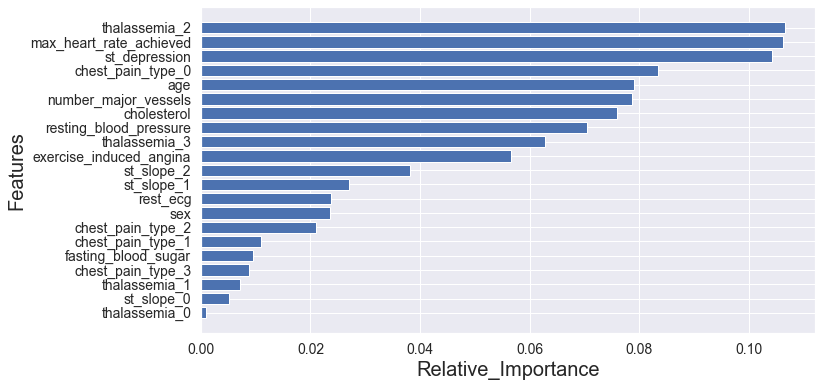

In [401]:
# Plot Feature Importance
Size_Font = 20
Legend_Size_Font = 14
Ticks_Size_Font = 14

fig, ax = plt.subplots(figsize=(11,6))
ax.barh(Name_Column, Score_Column,  align='center')
ax.tick_params( axis='both', labelsize = Ticks_Size_Font)   

ax.invert_yaxis() 
ax.set_xlabel("Relative_Importance",fontsize = Size_Font)
ax.set_ylabel("Features",fontsize = Size_Font)

print("MeanScore", np.mean(FeatureScores_Sorted))

## Feature Selection based on Feature Importance (Optional)

In [402]:
ThresholdforSelection = 0.021

sel = SelectFromModel(forest, prefit = True, threshold=ThresholdforSelection)
# sel.fit(X_train, y_train)
FeatureImportance = sel.get_support()
FeatureImportance

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True, False, False, False,  True,  True,
       False,  True,  True])

In [403]:
Name_Column_sorted = Name_Column.sort_index(ignore_index = True)
selected_feat= Name_Column_sorted[(sel.get_support())]
print("Length:",len(selected_feat))
print(selected_feat)
print(X_train.shape)

Length: 14
0                         age
1                         sex
2      resting_blood_pressure
3                 cholesterol
6     max_heart_rate_achieved
7     exercise_induced_angina
8               st_depression
9        number_major_vessels
10          chest_pain_type_0
12          chest_pain_type_2
16              thalassemia_2
17              thalassemia_3
19                 st_slope_1
20                 st_slope_2
Name: Feature_Name, dtype: object
(242, 21)


In [389]:
# get Indizes of True (important Features)
selected_feat = [i for i, x in enumerate(FeatureImportance) if x]
X_train = X_train[:,[selected_feat]]
X_test = X_test[:,[selected_feat]]


In [390]:
minimal_dims  = X_train.squeeze()
X_train= minimal_dims
minimal_dims  = X_test.squeeze()
X_test= minimal_dims
print(X_train.shape)
print(X_test.shape)

(242, 14)
(61, 14)


In [404]:
print(X_train.shape)
print(X_test.shape)

(242, 21)
(61, 21)


## Hyperparameters of the Models

In [409]:
#Support Vector Machine / Logistic Regression
C_range = np.logspace(-5,4,10)
gamma_range = np.logspace(-2, 2, 5)
print(C_range)
print(gamma_range)
#Random Forest
param_range = [1,2,3,4,5]

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [410]:
#Grid Hyperparameter for different Classifiers

#Logistic Regression
grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': C_range,
                   'clf__solver': ['liblinear']}] 

#Random Forest
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

#Support Vector Machine
grid_params_svm = [{'clf__kernel': [ 'rbf'], 
                    'clf__C': C_range,
                    'clf__gamma': gamma_range}]

## Training of the Models

In [411]:
#Pipline Approach - Train Multiple Classifiers

jobs = -1 # use all processors

# Construct pipelines  (Feature Scaling, Classifier)

#Logistic Regression
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state = 42))])
#Random Forest
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state = 42))])
#Support Vector Machine
pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('clf', svm.SVC(random_state = 42))])

# Construct grid searches

gs_lr = GridSearchCV(estimator=pipe_lr,
                     param_grid=grid_params_lr,
                     scoring='accuracy',
                     cv=10) 

gs_rf = GridSearchCV(estimator=pipe_rf,
                     param_grid=grid_params_rf,
                     scoring='accuracy',
                     cv=10, 
                     n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
                      param_grid=grid_params_svm,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=jobs)

# List of pipelines 
grids = [gs_lr,gs_rf, gs_svm]

# Dictionary of pipelines and classifier types
grid_dict = {0: 'Logistic Regression', 1: 'Random Forest', 2: 'Support Vector Machine'}


In [412]:
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search	
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    print("\nTest Score - Classification Report\n")
    print(classification_report(y_test,y_pred, digits=4))

    print(confusion_matrix(y_test,y_pred))
    
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])


Estimator: Logistic Regression
Best params: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.856
Test set accuracy score for best params: 0.770 

Test Score - Classification Report

              precision    recall  f1-score   support

           0     0.7188    0.8214    0.7667        28
           1     0.8276    0.7273    0.7742        33

    accuracy                         0.7705        61
   macro avg     0.7732    0.7744    0.7704        61
weighted avg     0.7776    0.7705    0.7707        61

[[23  5]
 [ 9 24]]

Estimator: Random Forest
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 2, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 2}
Best training accuracy: 0.839
Test set accuracy score for best params: 0.787 

Test Score - Classification Report

              precision    recall  f1-score   support

           0     0.8571    0.6429    0.7347        28
           1     0.7500    0.9091    0.8219        33

   

In [337]:
#Train best model with optimized parameters
pipe_model = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state = 42,
                                                   criterion = 'gini', 
                                                   max_depth = 3, 
                                                   min_samples_leaf = 1, 
                                                   min_samples_split = 4))])

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('clf',
                 RandomForestClassifier(max_depth=3, min_samples_split=4,
                                        random_state=42))])

In [338]:
y_predict = pipe_model.predict(X_test)
y_pred_quant = pipe_model.predict_proba(X_test)[:, 1]

In [340]:
print(y_predict)
print(y_pred_quant.shape)

[1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0]
(61,)


## Plot ROC-Curve

AUC Value: 0.9296536796536796


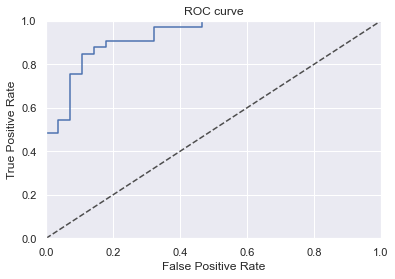

In [341]:
from sklearn.metrics import roc_curve, auc 

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC Value:",auc(fpr, tpr))

In [342]:
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(pipe_model, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = FeatureNames.tolist())


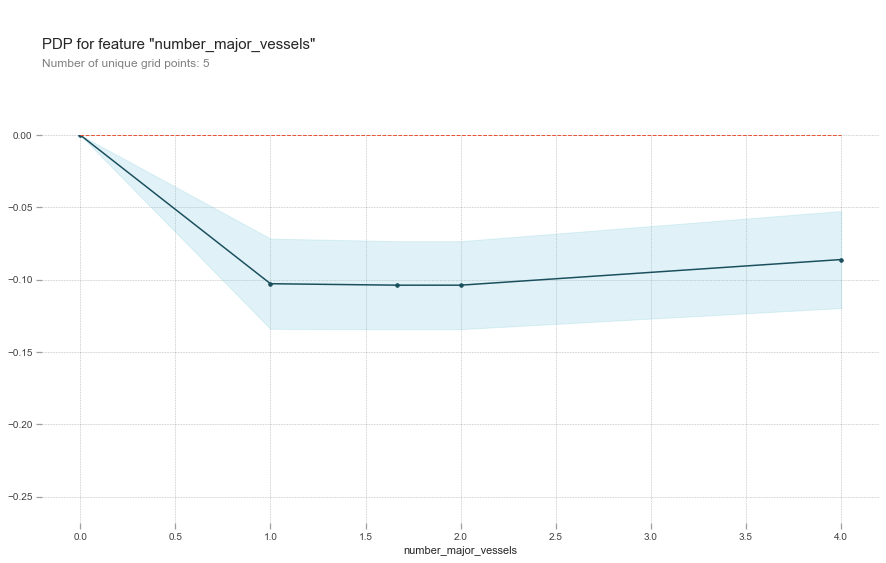

In [343]:
from pdpbox import pdp, info_plots 

#Use pd.df for split (pdp_isolate needs pd.df)
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(Raw_Data.drop('target', 1), Raw_Data['target'], test_size = 0.2, random_state=10)

base_features = Raw_Data.columns.values.tolist()
base_features.remove('target')

feat_name = 'number_major_vessels'
pdp_dist = pdp.pdp_isolate(model=pipe_model, dataset=X_test_df, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()



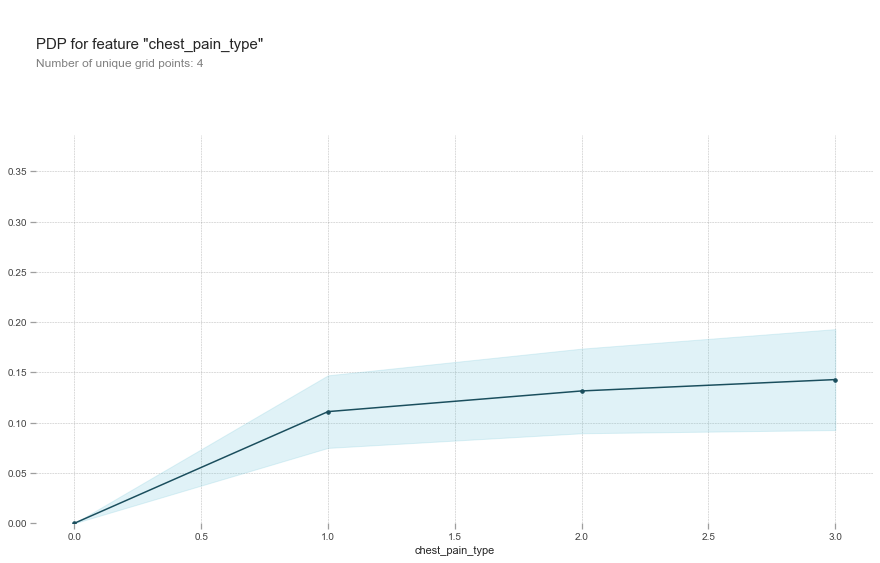

In [344]:
feat_name = 'chest_pain_type'
pdp_dist = pdp.pdp_isolate(model=pipe_model, dataset=X_test_df, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


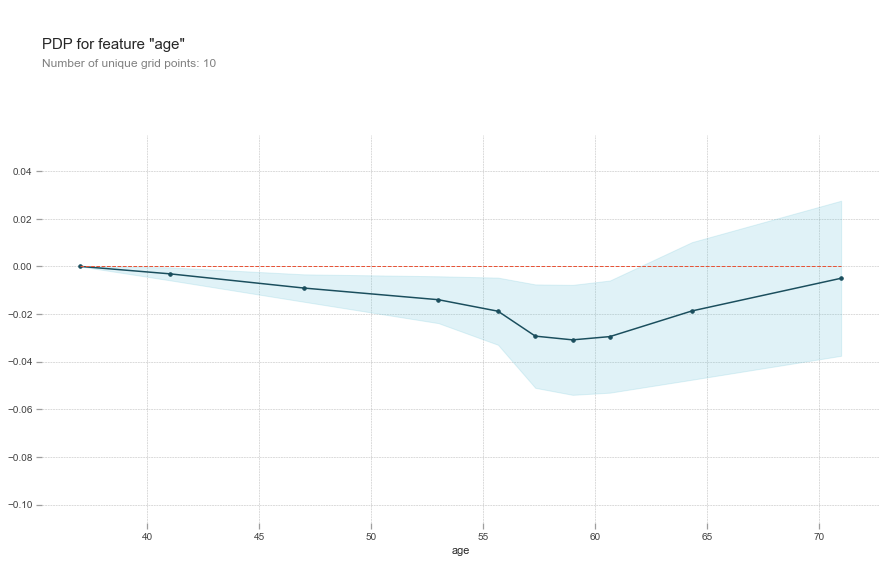

In [345]:
feat_name = 'age'
pdp_dist = pdp.pdp_isolate(model=pipe_model, dataset=X_test_df, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()